In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [15]:
data = pd.read_csv('USARrests.csv').copy()
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [16]:
data.index = data.iloc[:, 0]
data.drop('Unnamed: 0', axis=1, inplace=True)
data.index.name = ''

In [17]:
data.head()

,Murder,Assault,UrbanPop,Rape
,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


# Veri Analizi

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [20]:
data.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [25]:
data.size, data.shape

(200, (50, 4))

In [21]:
data.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [22]:
data.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


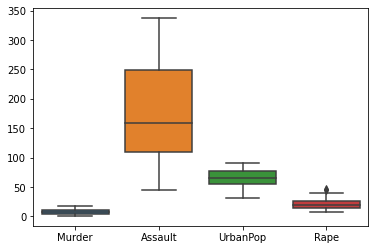

In [23]:
sns.boxplot(data=data);

# Model 

In [27]:
# Modeli oluşturalım ve eğitelim.
model = KMeans(n_clusters=4).fit(data)

In [29]:
cluster_centers = model.cluster_centers_
cluster_centers

array([[  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714]])

In [31]:
labels = model.labels_
labels

array([1, 1, 1, 3, 1, 3, 2, 1, 1, 3, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 3, 1,
       0, 1, 3, 2, 2, 1, 0, 3, 1, 1, 1, 0, 2, 3, 3, 2, 3, 1, 0, 3, 3, 2,
       0, 3, 3, 0, 0, 3])

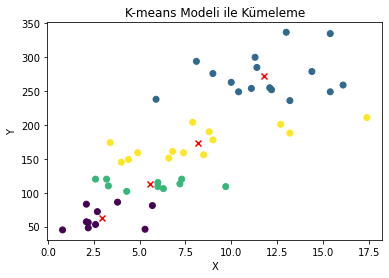

In [32]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red')
plt.title('K-means Modeli ile Kümeleme')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [33]:
pd.DataFrame({
    'Eyaletler':data.index, 
    'Kümeler':labels
})[0:10]

,Eyaletler,Kümeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,3
4,California,1
5,Colorado,3
6,Connecticut,2
7,Delaware,1
8,Florida,1
9,Georgia,3


C:\Users\murat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


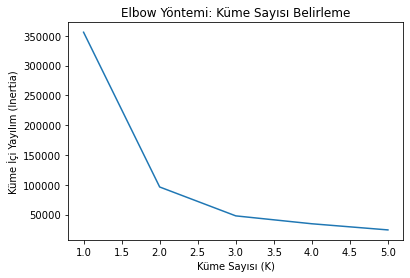

In [38]:
inertias = []
k_values = range(1, 6)

for k in k_values:
    model = KMeans(n_clusters=k).fit(data)
    inertia = model.inertia_
    inertias.append(inertia)
plt.plot(k_values, inertias),
plt.title('Elbow Yöntemi: Küme Sayısı Belirleme')
plt.xlabel('Küme Sayısı (K)')
plt.ylabel('Küme İçi Yayılım (Inertia)')
plt.show()

### Elbow noktası, küme sayısının artmasıyla elde edilen kazanımların azalmaya başladığı noktadır.

In [40]:
model = KMeans(n_clusters=2).fit(data)

In [41]:
cluster_centers = model.cluster_centers_
cluster_centers

array([[ 11.85714286, 255.        ,  67.61904762,  28.11428571],
       [  4.84137931, 109.75862069,  64.03448276,  16.24827586]])

In [42]:
labels = model.labels_
labels

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

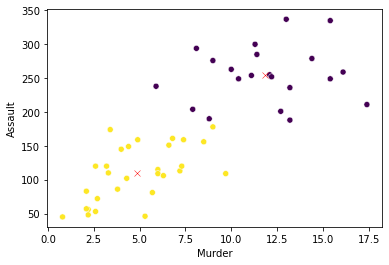

In [44]:
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], c=labels)
sns.scatterplot(x=cluster_centers[:, 0], y=cluster_centers[:, 1], marker='x', color='red')
plt.show()